In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

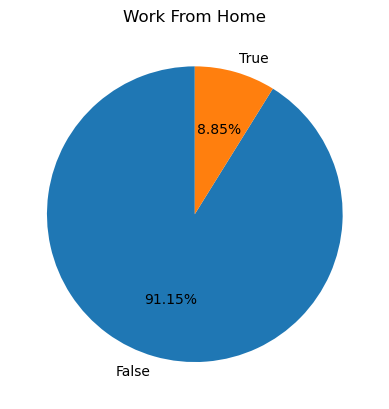

In [10]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f%%')
plt.title('Work From Home')
plt.ylabel('')
plt.show()

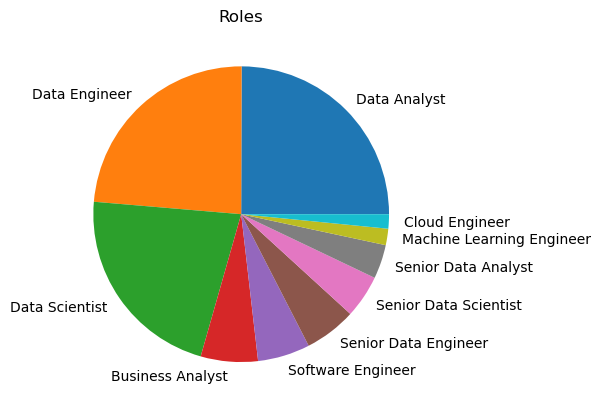

In [5]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Roles')
plt.ylabel('')
plt.show()

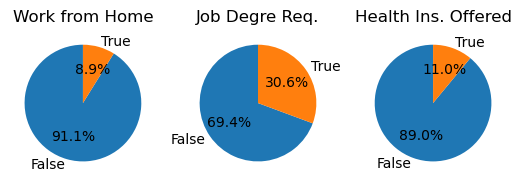

In [20]:
fig, ax = plt.subplots(1, 3)

dict_column = {
              'job_work_from_home':'Work from Home',
              'job_no_degree_mention':'Job Degre Req.',
              'job_health_insurance':'Health Ins. Offered'
             }
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=[False, True])
    ax[i].set_title(title)


In [ ]:
# Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:
# Create a new DataFrame called df_DA that only gets Data Analyst roles.
# Then count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
# Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
# Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.

In [22]:
df_job = df.copy()

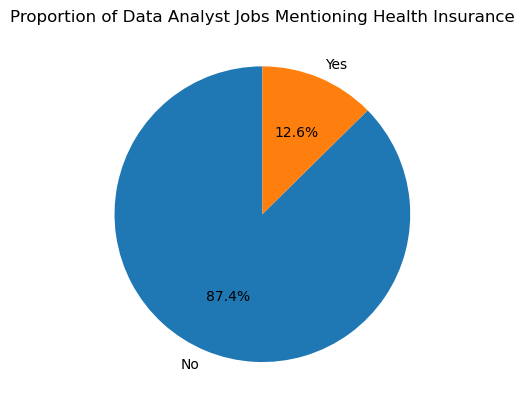

In [39]:
df_DA = df_job[df_job['job_title_short']=='Data Analyst']

plt.pie(df_DA['job_health_insurance'].value_counts(), startangle=90, autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()


In [ ]:
# Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
# Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
# Plot this using plt.pie(), setting labels parameter to the index, startangle to 90, and format values to display similarly to 23.1%.
# Add a title 'Job Schedule Full-time vs. Part-time'.

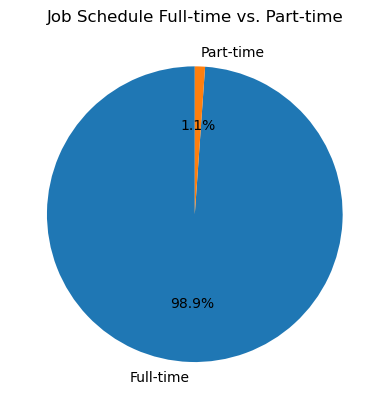

In [53]:
df_ft_pt = df_job[(df_job['job_schedule_type']=='Full-time') | (df_job['job_schedule_type']=='Part-time')]
plt.pie(df_ft_pt['job_schedule_type'].value_counts(), startangle=90, autopct='%1.1f%%', labels=['Full-time','Part-time'])
plt.title('Job Schedule Full-time vs. Part-time')
plt.show()

In [54]:
# Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.
# Only get job postings located in the US, create a new DataFrame with this filtered data called df_US.
# Use the job_no_degree_mention column for this purpose.
# Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the explode parameter set to (0, 0.1) inside of plt.pie())
# Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

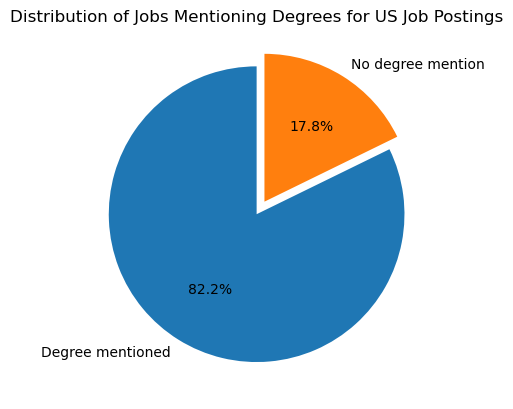

In [68]:
df_US = df_job[df_job['job_country']=='United States']
plt.pie(df_US['job_no_degree_mention'].value_counts(), startangle=90, labels=['Degree mentioned','No degree mention'], autopct='%1.1f%%', explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()

In [55]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa